In [1]:
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
from scipy.stats import chi2
import gzip
from tqdm.notebook import trange, tqdm
import glob
import random
import seaborn as sns
from joblib import Parallel, delayed
import scipy as sp


In [65]:
STD_200_FLIPS = math.sqrt(200)/2

In [38]:
l = 100000000
random_data = np.random.binomial(1, 0.5, l)
xor_filter = np.tile([0,1],l//2)
random_data = np.logical_xor(random_data,xor_filter).astype(np.int8)
print("mean:", random_data.mean(), " std: ", random_data.std() )

mean: 0.49997441  std:  0.4999999993451525


In [41]:
l = 100000000
fake_shift = 0.1
random_data = np.random.binomial(1, 0.5+fake_shift, l)
#xor_filter = np.tile([0,1],l//2)
#random_data = np.logical_xor(random_data,xor_filter).astype(np.int8)
print("mean:", random_data.mean(), " std: ", random_data.std() )

mean: 0.60004445  std:  0.4898888731377756


In [45]:
l = 100000000
fake_shift = 0.01
random_data = np.random.binomial(1, 0.5+fake_shift, l)
xor_filter = np.tile([0,1],l//2)
random_data = np.logical_xor(random_data,xor_filter).astype(np.int8)
print("mean:", random_data.mean(), " std: ", random_data.std() )

mean: 0.50001603  std:  0.49999999974303805


0.4999999999908207

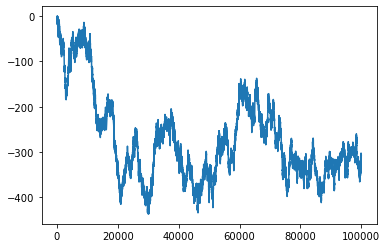

In [82]:
l = 100000
fake_shift = 0.0
random_data = np.random.binomial(1, 0.5+fake_shift, (l,200))
#xor_filter = np.tile([0,1],(l,100))
#random_data = np.logical_xor(random_data,xor_filter).astype(np.int8)
random_data = random_data.sum(axis=1)

z_norm_test=(random_data-100)/STD_200_FLIPS
plt.plot(list(range(len(z_norm_test))), np.cumsum(z_norm_test**2-1))

In [115]:
l = 500000
fake_shift = 0.1

results = []
for i in tqdm(range(0,200)):
    random_bit = random.getrandbits(1)
    to_shift_bit = random.getrandbits(1)
    
    random_data = np.random.binomial(1, 0.5+(fake_shift if to_shift_bit else 0) , (l,200))
    
    if random_bit:
        xor_filter = np.tile([0,1],(l,100))
        random_data = np.logical_xor(random_data,xor_filter).astype(np.int8)
    
    random_data = random_data.sum(axis=1)

    z_norm_test=(random_data-100)/STD_200_FLIPS
    
    results.append({"result":np.cumsum(z_norm_test**2-1)[-1],
                    "random_bit":random_bit,
                    "random_shift_bit":to_shift_bit})

  0%|          | 0/200 [00:00<?, ?it/s]

In [116]:
results = pd.DataFrame(results)

In [120]:
results[(results.random_bit==0)&(results.random_shift_bit==0)].result.mean()

-146.09060606093112

In [122]:
results[(results.random_bit==0)&(results.random_shift_bit==1)].result.mean()

3979551.2823540634

In [121]:
results[(results.random_bit==1)&(results.random_shift_bit==0)].result.mean()

280.1773333331073

In [123]:
results[(results.random_bit==1)&(results.random_shift_bit==1)].result.mean()

-20026.525263141422